In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import urllib.request
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [2]:
data = pd.read_csv("dataset.csv")
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
#Show the name of the columns, Dtype and Non-null Count
data.info()
print(f'\nColumn names:\n{data.columns}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [4]:
# Understanding the dataset's structure and dimensions
print(f'Dataset shape:\n{data.shape}')
print(f'\nColumn names:\n{data.columns}')
print()

#Shows the statistics of all numerical attributes in the dataset
data.describe()

Dataset shape:
(480, 17)

Column names:
Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')



,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [5]:
print(f'Number of Null value in each column in dataset: \n\n{data.isnull().sum()}')

Number of Null value in each column in dataset: 

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


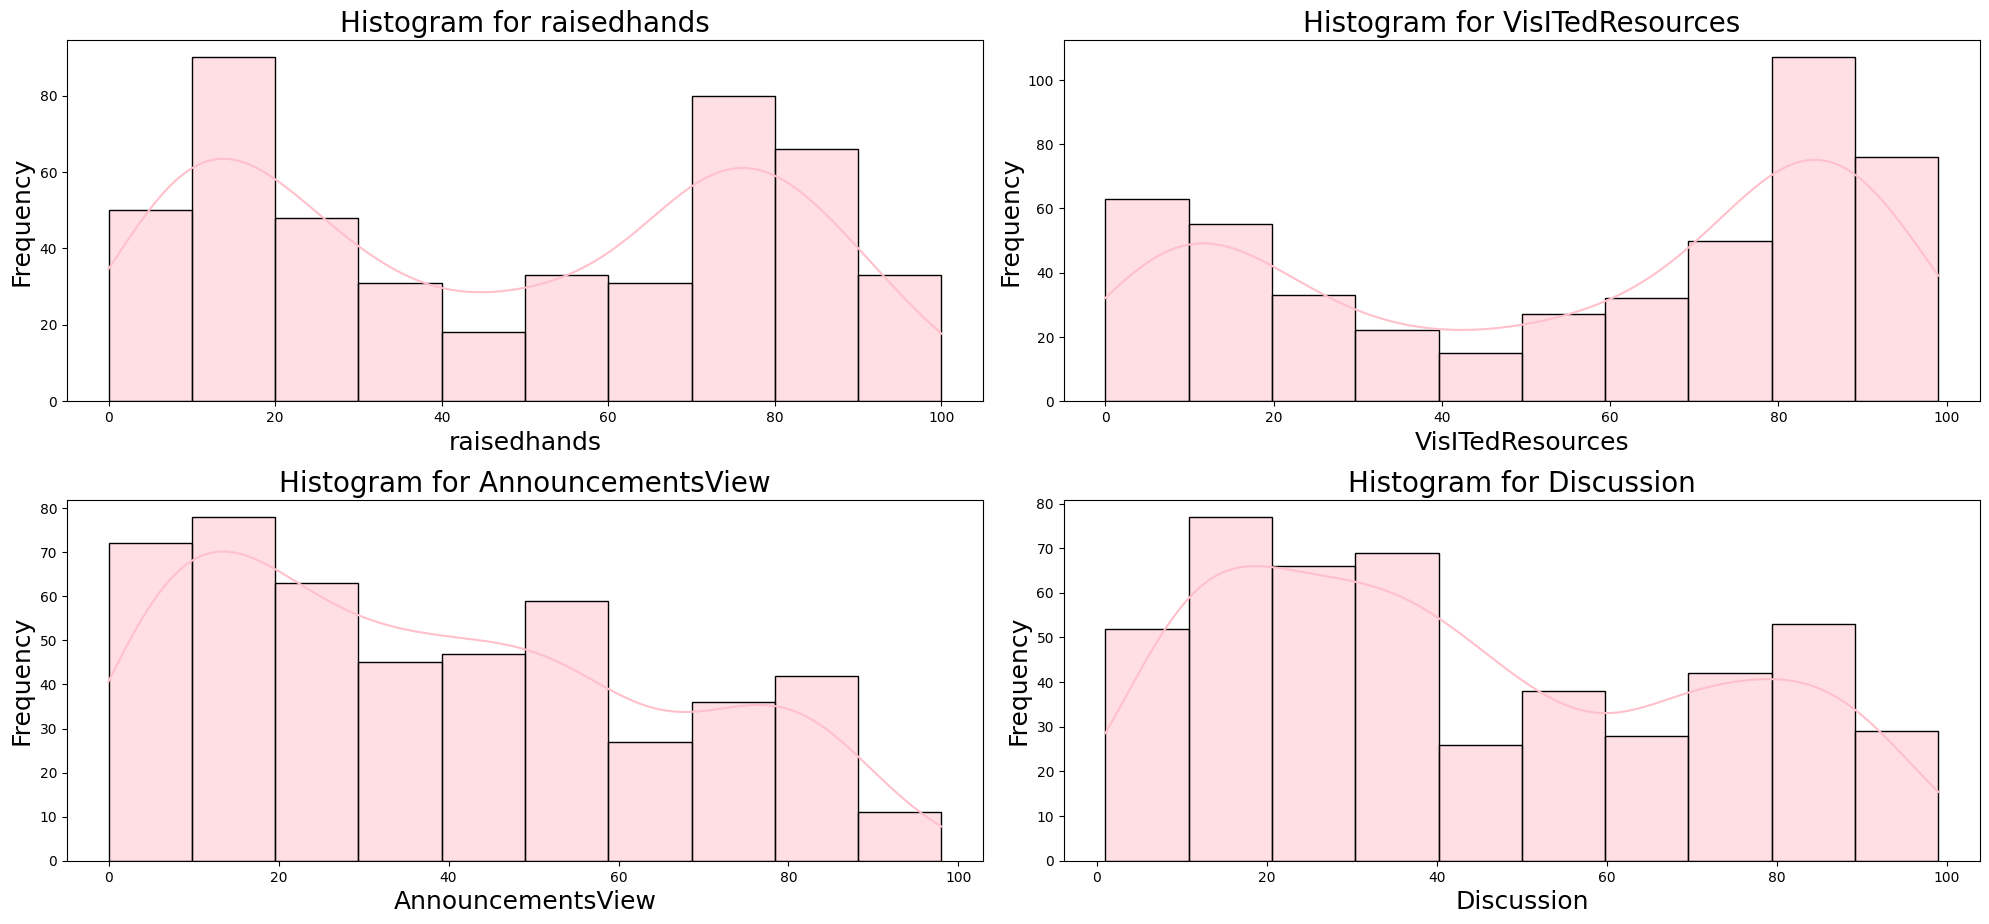

In [6]:
# List of numeric columns
numeric_columns =['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Loop through the numeric columns and create a subplot for each
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)  # Adjust number of rows/columns depending on the number of plots
    sns.histplot(data[column], kde=True, color='pink')
    plt.title(f'Histogram for {column}', size=20)
    plt.xlabel(column, size=18)
    plt.ylabel('Frequency', size=18)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [7]:
# List of categorial columns
categorial_col = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

#examine the distribution of categories using value counts for categorial data
for column in categorial_col:
    counts = data[column].value_counts()
    print(counts)
    print('------------------------------')

gender
M    305
F    175
Name: count, dtype: int64
------------------------------
NationalITy
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64
------------------------------
PlaceofBirth
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
USA             16
SaudiArabia     16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64
------------------------------
StageID
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: count, dtype: int64
------------------------------
GradeID
G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05  

Class
M    211
H    142
L    127
Name: count, dtype: int64

Number of students with Middle-Level grade (70-89) are 211, 
Number of students with High-Level grade (90-100 are) 142 and 
Number of students with Low-Level grade (0-69) are 127


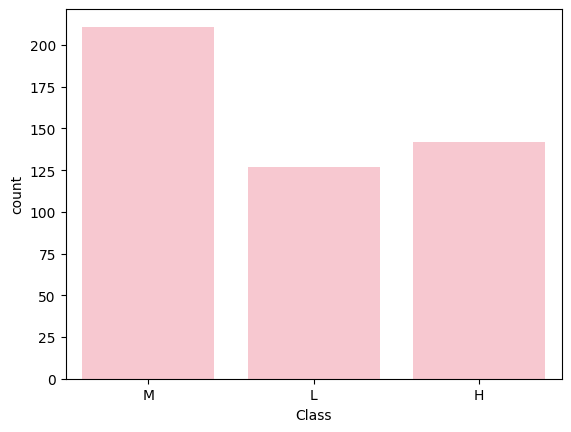

In [8]:
x=(data['Class'].value_counts())
print(x)

sns.countplot(data=data, x="Class", color='pink')
print(f'\nNumber of students with Middle-Level grade (70-89) are {x.iloc[0]}, \nNumber of students with High-Level grade (90-100 are) {x.iloc[1]} and \nNumber of students with Low-Level grade (0-69) are {x.iloc[2]}')


In [9]:
cat_att = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']         
num_att = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

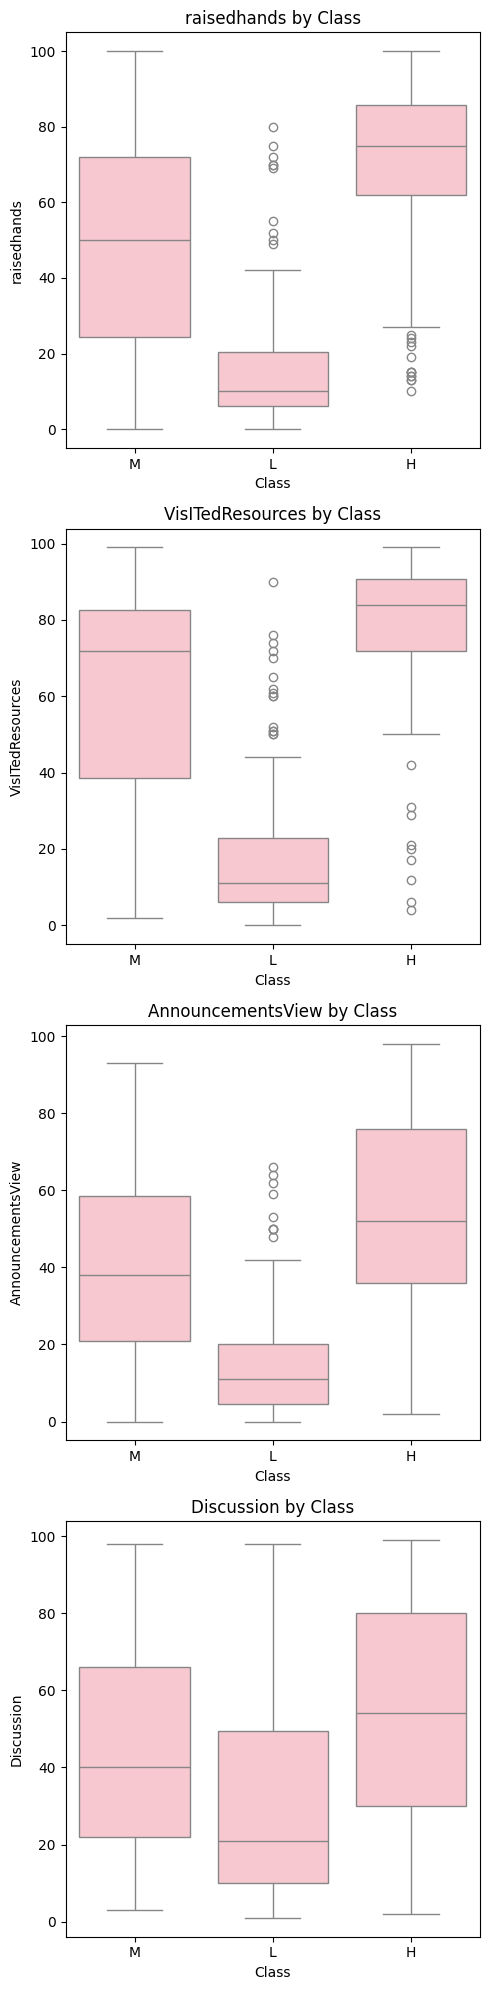

In [10]:
n_cat = 1
n_cont = len(num_att)

fig, axes = plt.subplots(nrows=n_cont, ncols=n_cat, figsize=(5*n_cat, 5*n_cont), sharex=False, sharey=False)

for i, cont_col in enumerate(num_att):
    sns.boxplot(x=data['Class'], y=cont_col, data=data, ax=axes[i], color='pink')
    axes[i].set_title(f'{cont_col} by {"Class"}')

plt.tight_layout()
plt.show()

In [11]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix["VisITedResources"].sort_values(ascending=False)

VisITedResources     1.000000
raisedhands          0.691572
AnnouncementsView    0.594500
Discussion           0.243292
Name: VisITedResources, dtype: float64

<li>correlation coefficient, which can vary from -1 to 1, indicates the strength and direction of the relationship between two variables.</li><li>Coefficient close to 1 suggests a strong positive correlation. Conversely, a coefficient close to -1 indicates a strong negative correlation.</li><li>Coefficients near 0 indicate no linear correlation between the variables.</li>

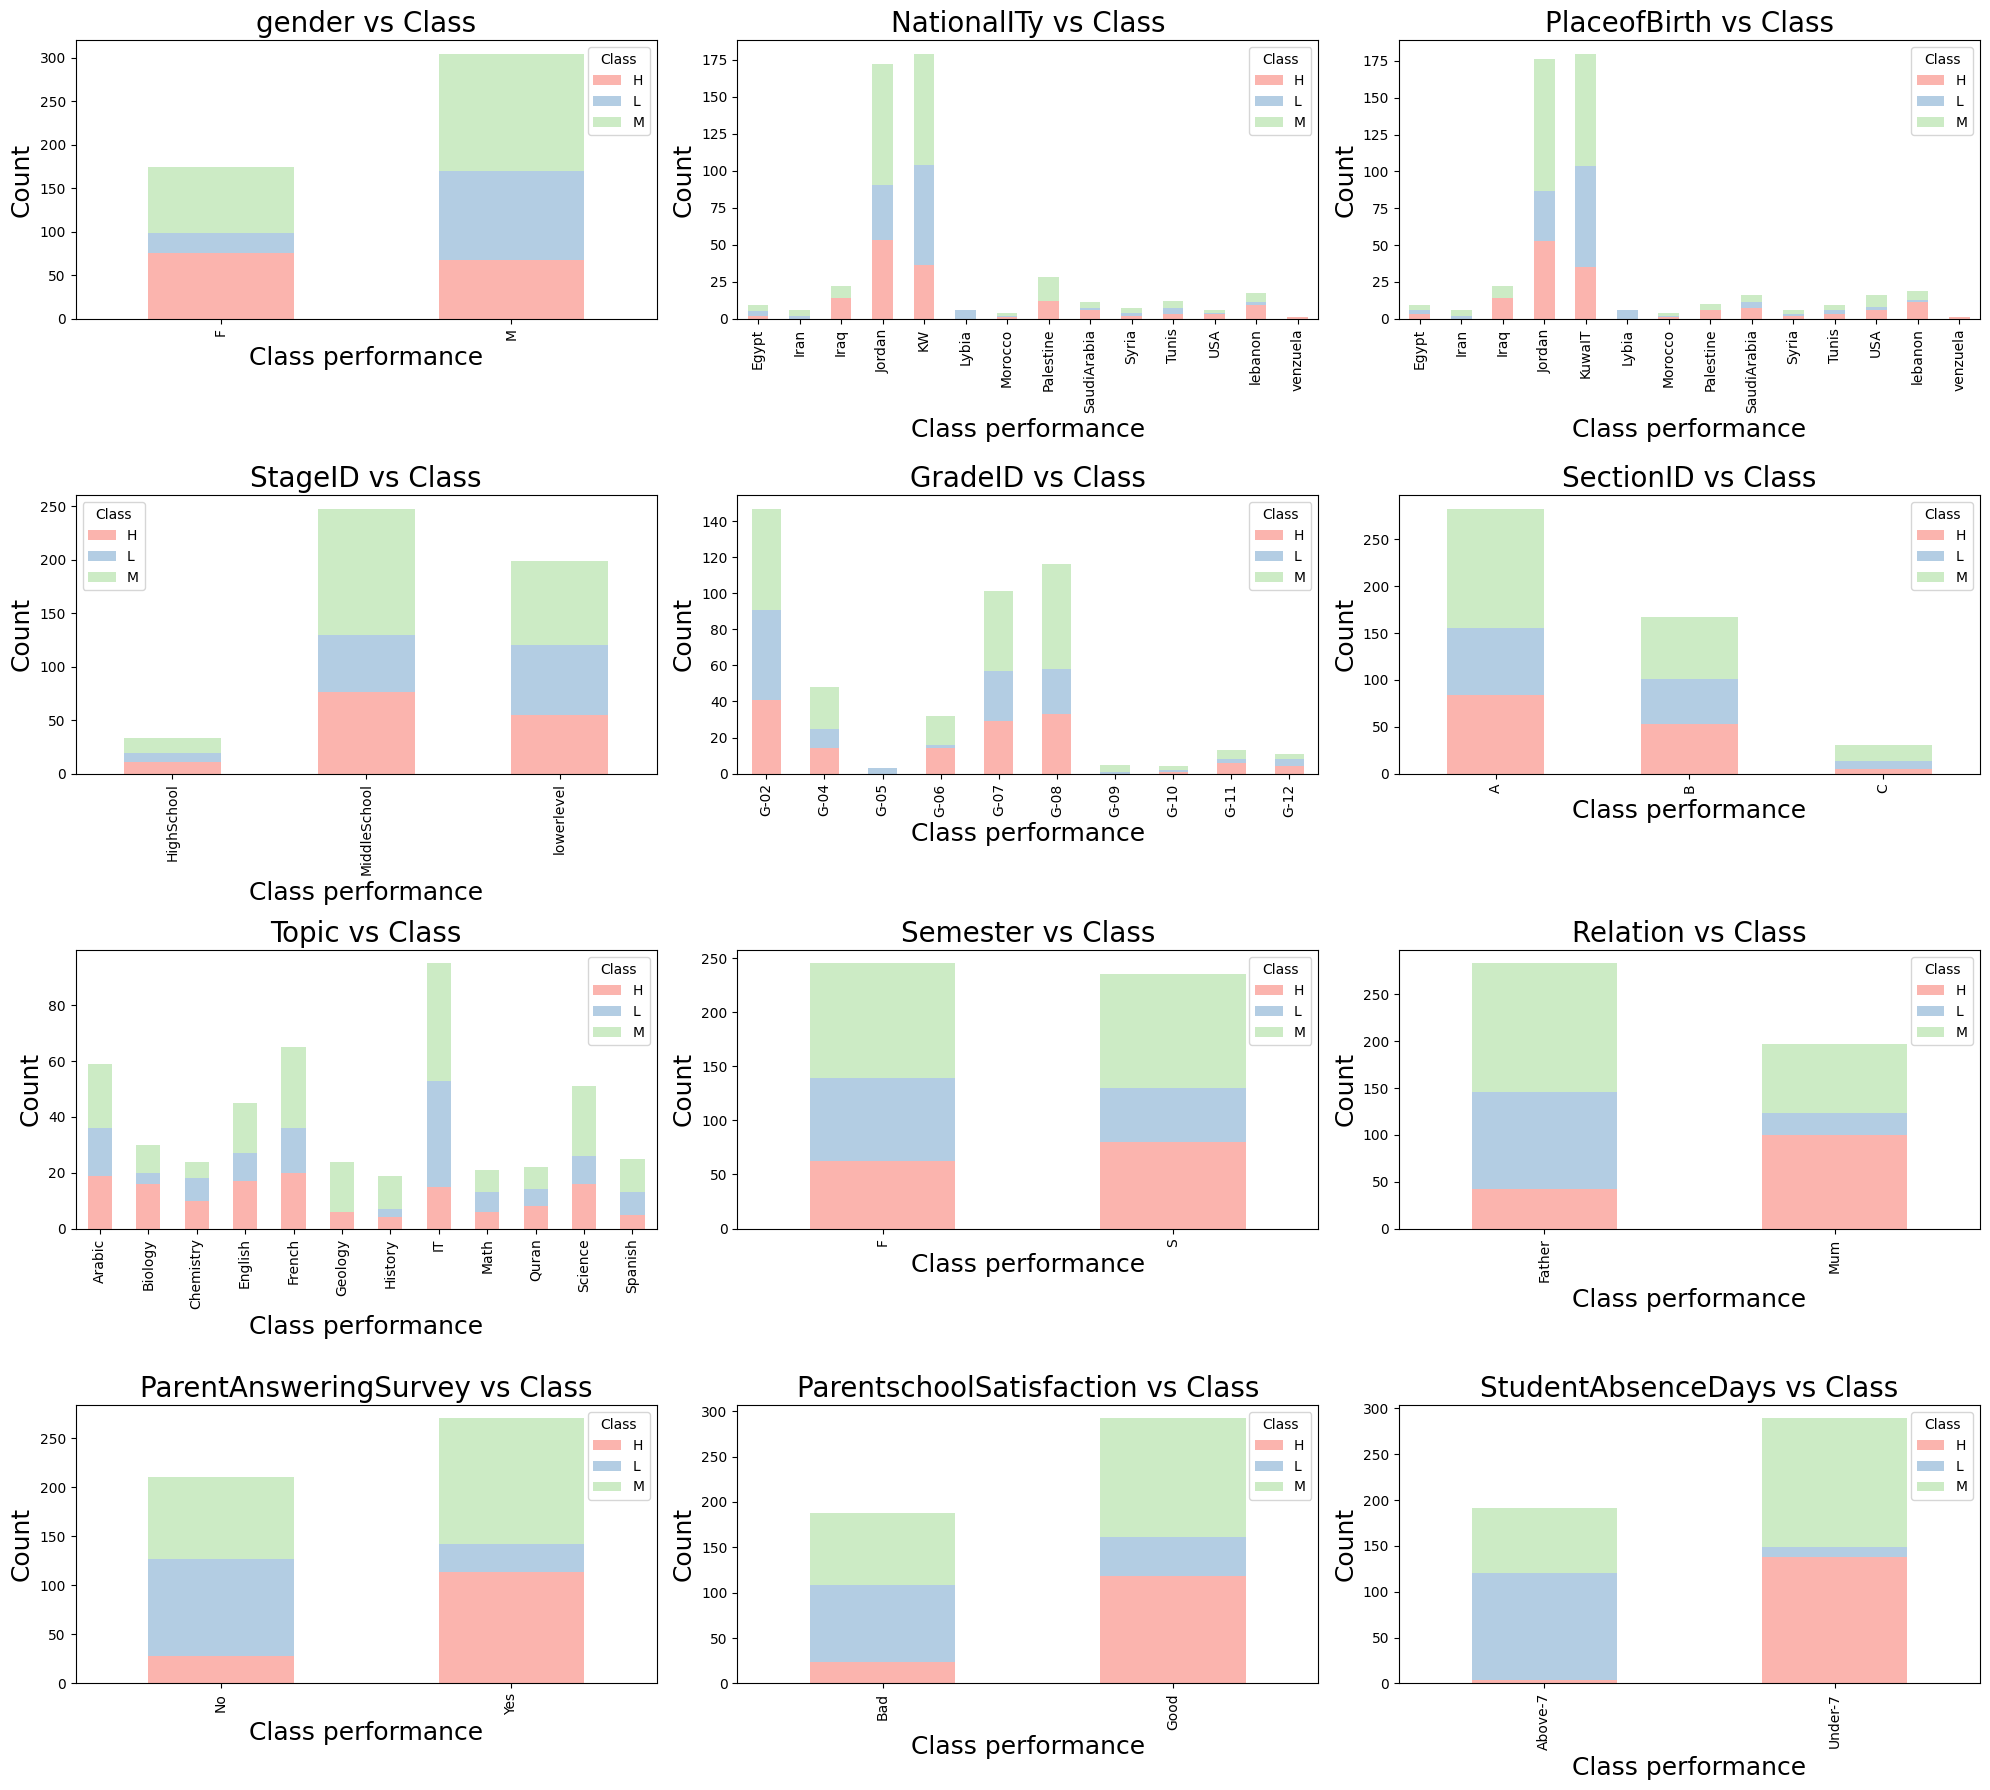

In [12]:
# Create a custom palette using 'Pastel1'
pastel_palette = sns.color_palette('Pastel1', n_colors=len(data['Class'].unique()))

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Adjust the number of subplots based on the number of categorical attributes
total_plots = len(cat_att)
grid_rows = (total_plots // 3) + 1 if total_plots % 3 != 0 else total_plots // 3

# Loop through the categorical columns and create a subplot for each
for i, column in enumerate(cat_att, 1):
    plt.subplot(grid_rows, 3, i)  # Adjust the number of rows/columns depending on the number of plots
    
    # Create a cross-tabulation to count occurrences of each 'Class' per 'column' category
    ct = pd.crosstab(data[column], data['Class'])
    
    # Plot the bar plot with categorical attribute on y-axis and 'Class' on x-axis
    ct.plot(kind='bar', stacked=True, ax=plt.gca(), color=pastel_palette)  # Use current axis to plot
    
    plt.title(f'{column} vs Class', size=20)
    plt.xlabel('Class performance', size=18)
    plt.ylabel('Count', size=18)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Feature Engineering

In [13]:
def nationality_group(country):
    if country in ['Kuwait', 'Jordan', 'Iraq', 'Lebanon', 'Saudi Arabia', 'Palestine', 'Syria']:
        return 'Middle_East'
    elif country in ['Egypt', 'Tunisia', 'Libya', 'Morocco']:
        return 'North_Africa'
    else:
        return 'Others'

data['NationalityGroup'] = data['NationalITy'].apply(nationality_group)

def grade_group(grade):
    if grade in ['G-02', 'G-04', 'G-05']:
        return 'G-02 - G-05'
    elif grade in ['G-06', 'G-07', 'G-08']:
        return 'G-06 - G08'
    else:
        return 'G-09 - G-12'

data['GradeGroup'] = data['GradeID'].apply(grade_group)

def Topic_group(subject):
    if subject in ['French', 'Arabic', 'English', 'Spanish']:
        return 'Languages'
    elif subject in ['IT', 'Science', 'Biology', 'Chemistry', 'Geology']:
        return 'Sciences'
    elif subject in ['History']:
        return 'Humanities'
    elif subject in ['Quran']:
        return 'Religious_Studies'
    else:
        return 'Math'

data['SubjectGroups'] = data['Topic'].apply(Topic_group)

# Define numerical and categorical features after feature engineering
num_attribs = ['Discussion', 'VisITedResources', 'raisedhands', 'AnnouncementsView',]
catt_attribs = ['gender', 'NationalityGroup','GradeGroup', 'StageID', 'SectionID', 'SubjectGroups', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

In [14]:
train, test = train_test_split(data, test_size=0.2, random_state=42)
train.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,NationalityGroup,GradeGroup,SubjectGroups
132,M,KW,KuwaIT,lowerlevel,G-02,C,IT,S,Father,0,3,10,3,No,Bad,Above-7,L,Others,G-02 - G-05,Sciences
228,M,KW,KuwaIT,HighSchool,G-11,B,Math,S,Mum,73,84,77,81,Yes,Good,Above-7,H,Others,G-09 - G-12,Math
473,M,Palestine,Palestine,MiddleSchool,G-08,A,Geology,S,Father,85,88,79,70,Yes,Good,Under-7,M,Middle_East,G-06 - G08,Sciences
42,M,KW,KuwaIT,HighSchool,G-09,A,IT,F,Father,10,12,7,33,Yes,Good,Above-7,L,Others,G-09 - G-12,Sciences
360,M,Jordan,Jordan,lowerlevel,G-02,A,Arabic,F,Father,20,88,31,28,Yes,Good,Above-7,M,Middle_East,G-02 - G-05,Languages


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 132 to 102
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    384 non-null    object
 1   NationalITy               384 non-null    object
 2   PlaceofBirth              384 non-null    object
 3   StageID                   384 non-null    object
 4   GradeID                   384 non-null    object
 5   SectionID                 384 non-null    object
 6   Topic                     384 non-null    object
 7   Semester                  384 non-null    object
 8   Relation                  384 non-null    object
 9   raisedhands               384 non-null    int64 
 10  VisITedResources          384 non-null    int64 
 11  AnnouncementsView         384 non-null    int64 
 12  Discussion                384 non-null    int64 
 13  ParentAnsweringSurvey     384 non-null    object
 14  ParentschoolSatisfaction  384

In [16]:
train['Class'].value_counts()

Class
M    163
H    120
L    101
Name: count, dtype: int64

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

num_attribs = ['Discussion', 'VisITedResources', 'raisedhands', 'AnnouncementsView',]
catt_attribs = ['gender', 'NationalityGroup', 'SectionID', 'SubjectGroups', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction','StudentAbsenceDays']
catt_ordi_attribs = ['GradeGroup', 'StageID']

#Data = train.drop("Class", axis=1) #X
Data = train.drop(["Class","NationalITy","PlaceofBirth","Topic", "GradeID"], axis=1) #X
Data_ClassPerformance = train['Class'].copy() #y

def log_transform(Data):
    return np.log1p(Data)

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(func=log_transform, validate=False),
    StandardScaler()
)

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"),
    FunctionTransformer(func=log_transform, validate=False),
    
)

cat_ordi_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(handle_unknown="error"),
    FunctionTransformer(func=log_transform, validate=False),)
    

# Column transformer
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("catt", cat_pipeline, catt_attribs),
    ("catt_ordi", cat_ordi_pipeline, catt_ordi_attribs)
])

Data_prepared = preprocessing.fit_transform(Data)

In [18]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 132 to 102
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    384 non-null    object
 1   StageID                   384 non-null    object
 2   SectionID                 384 non-null    object
 3   Semester                  384 non-null    object
 4   Relation                  384 non-null    object
 5   raisedhands               384 non-null    int64 
 6   VisITedResources          384 non-null    int64 
 7   AnnouncementsView         384 non-null    int64 
 8   Discussion                384 non-null    int64 
 9   ParentAnsweringSurvey     384 non-null    object
 10  ParentschoolSatisfaction  384 non-null    object
 11  StudentAbsenceDays        384 non-null    object
 12  NationalityGroup          384 non-null    object
 13  GradeGroup                384 non-null    object
 14  SubjectGroups             384

In [19]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(func=<function log_transform at 0x767ee355d9e0>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Discussion', 'VisITedResources',
                                  'raisedhands', 'AnnouncementsView']),
                                ('catt',
                                 Pipeline(steps=[('simpleimputer',
                                                  Simple...
                                  'SubjectGroups', 'Semester', 'Relation',
                                  'ParentAnsweringSurvey',
                                  'ParentschoolSatisfaction',
                                  'StudentAbsenceDays']),
                                ('catt_ordi',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder()),
                                                 ('functiontransformer',
                                                  FunctionTransformer(func=<function log_transform at 0x767ee355d9e0>))]),
                                 ['GradeGroup', 'StageID'])])

In [20]:
from sklearn.preprocessing import LabelEncoder

lencoder = LabelEncoder()
lencoder.fit(Data_ClassPerformance)
Data_ClassPerformance = lencoder.transform(Data_ClassPerformance)
Data_ClassPerformance

array([1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1,
       0, 1, 2, 2, 2, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0,
       2, 1, 2, 0, 0, 2, 2, 2, 1, 1, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 1, 1,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 1, 1, 0, 0,
       2, 1, 0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 1, 2, 0,
       0, 2, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 1, 0, 1,
       1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 0, 0,
       0, 2, 0, 0, 2, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 0, 1, 1, 2, 2,
       1, 2, 0, 2, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2, 0, 2, 2, 0,
       2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 0, 2,

In [21]:
lencoder.classes_

array(['H', 'L', 'M'], dtype=object)

## Model Training (Can add or remove or replace the training model here)

In [22]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = make_pipeline(preprocessing, RandomForestClassifier(random_state=42))
forest_clf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function log_transform at 0x767ee355d9e0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Discussion',
                                                   'VisITedResources',
                                                   'raisedhands',
                                                   'AnnouncementsView']),
                                                 ('catt',
                                                  Pi...
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays']),
                                                 ('catt_ordi',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder()),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function log_transform at 0x767ee355d9e0>))]),
                                                  ['GradeGroup', 'StageID'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [23]:
forest_acc = cross_val_score(forest_clf, 
                            Data, Data_ClassPerformance,
                            scoring="accuracy",
                            cv=10)
print(forest_acc)


[0.74358974 0.87179487 0.74358974 0.79487179 0.84210526 0.86842105
 0.76315789 0.81578947 0.76315789 0.84210526]


In [24]:
print(f"Mean Accuracy: {np.mean(forest_acc)}")
print(f"Standard Deviation of Accuracy: {np.std(forest_acc)}")

Mean Accuracy: 0.8048582995951417
Standard Deviation of Accuracy: 0.04743431368211333


#### If the mean accuracy is high (closer to 1) and the standard deviation is low, it indicates that the model is consistently performing well across different folds. Conversely, a high standard deviation suggests that the model's performance is inconsistent, and further tuning or validation might be required.

In [25]:
tree_clf = make_pipeline(preprocessing, DecisionTreeClassifier(random_state=42))
tree_clf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function log_transform at 0x767ee355d9e0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Discussion',
                                                   'VisITedResources',
                                                   'raisedhands',
                                                   'AnnouncementsView']),
                                                 ('catt',
                                                  Pi...
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays']),
                                                 ('catt_ordi',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder()),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function log_transform at 0x767ee355d9e0>))]),
                                                  ['GradeGroup', 'StageID'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [26]:
tree_acc = cross_val_score(tree_clf, 
                              Data, Data_ClassPerformance,
                              scoring="accuracy", 
                              cv=10)

tree_acc

array([0.58974359, 0.74358974, 0.69230769, 0.71794872, 0.71052632,
       0.68421053, 0.73684211, 0.71052632, 0.60526316, 0.57894737])

In [27]:
print(f"Mean Accuracy: {np.mean(tree_acc)}")
print(f"Standard Deviation of Accuracy: {np.std(tree_acc)}")

Mean Accuracy: 0.6769905533063427
Standard Deviation of Accuracy: 0.05882226378074379


In [28]:
svm_clf = make_pipeline(preprocessing, SVC(random_state=42))
svm_clf 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function log_transform at 0x767ee355d9e0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Discussion',
                                                   'VisITedResources',
                                                   'raisedhands',
                                                   'AnnouncementsView']),
                                                 ('catt',
                                                  Pi...
                                                   'Semester', 'Relation',
                                                   'ParentAnsweringSurvey',
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays']),
                                                 ('catt_ordi',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder()),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function log_transform at 0x767ee355d9e0>))]),
                                                  ['GradeGroup', 'StageID'])])),
                ('svc', SVC(random_state=42))])

In [29]:
svm_acc = cross_val_score(svm_clf , 
                            Data, Data_ClassPerformance,
                            scoring="accuracy",
                            cv=10)
print(svm_acc)

[0.66666667 0.71794872 0.74358974 0.61538462 0.76315789 0.81578947
 0.76315789 0.71052632 0.71052632 0.76315789]


In [30]:
print(f"Mean Accuracy: {np.mean(svm_acc)}")
print(f"Standard Deviation of Accuracy: {np.std(svm_acc)}")

Mean Accuracy: 0.7269905533063429
Standard Deviation of Accuracy: 0.05366913902435319


In [31]:
log_reg = make_pipeline(preprocessing, LogisticRegression(random_state=42))
log_reg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function log_transform at 0x767ee355d9e0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Discussion',
                                                   'VisITedResources',
                                                   'raisedhands',
                                                   'AnnouncementsView']),
                                                 ('catt',
                                                  Pi...
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays']),
                                                 ('catt_ordi',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder()),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function log_transform at 0x767ee355d9e0>))]),
                                                  ['GradeGroup', 'StageID'])])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [32]:
log_scores = cross_val_score(log_reg, 
                            Data, Data_ClassPerformance,
                            scoring="accuracy",
                            cv=10)
print(log_scores)

[0.71794872 0.74358974 0.82051282 0.64102564 0.73684211 0.76315789
 0.63157895 0.73684211 0.76315789 0.68421053]


In [33]:
gb_clf = make_pipeline(preprocessing, GradientBoostingClassifier(random_state=42))
gb_clf 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function log_transform at 0x767ee355d9e0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Discussion',
                                                   'VisITedResources',
                                                   'raisedhands',
                                                   'AnnouncementsView']),
                                                 ('catt',
                                                  Pi...
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays']),
                                                 ('catt_ordi',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder()),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function log_transform at 0x767ee355d9e0>))]),
                                                  ['GradeGroup', 'StageID'])])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [34]:
gb_acc = cross_val_score(gb_clf, 
                            Data, Data_ClassPerformance,
                            scoring="accuracy",
                            cv=10)
print(gb_acc)

[0.69230769 0.84615385 0.66666667 0.71794872 0.81578947 0.81578947
 0.78947368 0.73684211 0.65789474 0.76315789]


In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = make_pipeline(preprocessing, KNeighborsClassifier())

knn_clf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function log_transform at 0x767ee355d9e0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Discussion',
                                                   'VisITedResources',
                                                   'raisedhands',
                                                   'AnnouncementsView']),
                                                 ('catt',
                                                  Pi...
                                                   'ParentAnsweringSurvey',
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays']),
                                                 ('catt_ordi',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder()),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function log_transform at 0x767ee355d9e0>))]),
                                                  ['GradeGroup', 'StageID'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [36]:
knn_clf = cross_val_score(knn_clf, 
                          Data, Data_ClassPerformance,
                          scoring="accuracy",
                          cv=10)

print(knn_clf)

[0.64102564 0.74358974 0.64102564 0.69230769 0.71052632 0.73684211
 0.76315789 0.73684211 0.68421053 0.73684211]


In [37]:
print(f"Mean Accuracy Forest\t\t: {np.mean(forest_acc)}")
print(f"Standard Deviation of Accuracy\t: {np.std(forest_acc)}")
print(f"\nMean Accuracy Tree\t\t: {np.mean(tree_acc)}")
print(f"Standard Deviation of Accuracy\t: {np.std(tree_acc)}")
print(f"\nMean Accuracy SVM\t\t: {np.mean(svm_acc)}")
print(f"Standard Deviation of Accuracy\t: {np.std(svm_acc)}")
print(f"\nMean Accuracy Log Regression\t: {np.mean(log_scores)}")
print(f"Standard Deviation of Accuracy\t: {np.std(log_scores)}")
print(f"\nMean Accuracy G'Boosting \t: {np.mean(gb_acc)}")
print(f"Standard Deviation of Accuracy\t: {np.std(gb_acc)}")


Mean Accuracy Forest		: 0.8048582995951417
Standard Deviation of Accuracy	: 0.04743431368211333

Mean Accuracy Tree		: 0.6769905533063427
Standard Deviation of Accuracy	: 0.05882226378074379

Mean Accuracy SVM		: 0.7269905533063429
Standard Deviation of Accuracy	: 0.05366913902435319

Mean Accuracy Log Regression	: 0.7238866396761134
Standard Deviation of Accuracy	: 0.05490090190016033

Mean Accuracy G'Boosting 	: 0.7502024291497975
Standard Deviation of Accuracy	: 0.06292027111881329


## Fine Tuning short listed models

In [38]:
from sklearn.pipeline import Pipeline

dt_full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("Random_forest", RandomForestClassifier(random_state=42)),
])

dt_full_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function log_transform at 0x767ee355d9e0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Discussion',
                                                   'VisITedResources',
                                                   'raisedhands',
                                                   'AnnouncementsView']),
                                                 ('catt',
                                                  Pipeli...
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays']),
                                                 ('catt_ordi',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder()),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function log_transform at 0x767ee355d9e0>))]),
                                                  ['GradeGroup', 'StageID'])])),
                ('Random_forest', RandomForestClassifier(random_state=42))])

In [39]:
# Define the parameter grid for RandomForestClassifier in the pipeline
param_grid = [
    {'Random_forest__n_estimators': [10, 50, 100],  
     'Random_forest__max_depth': [1, 2, 3, 4, 6, 8],
     'Random_forest__criterion': ['gini', 'entropy']}
]

# Set up GridSearchCV with the corrected pipeline and parameter grid
grid_forest = GridSearchCV(dt_full_pipeline, param_grid, cv=2, scoring='accuracy')

# Fit the GridSearchCV object
grid_forest.fit(Data, Data_ClassPerformance)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(func=<function log_transform at 0x767ee355d9e0>)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Discussion',
                                                                          'VisITedResources',
                                                                          'raisedhands',
                                                                          'Announc...
                                                                                          OrdinalEncoder()),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(func=<function log_transform at 0x767ee355d9e0>))]),
                                                                         ['GradeGroup',
                                                                          'StageID'])])),
                                       ('Random_forest',
                                        RandomForestClassifier(random_state=42))]),
             param_grid=[{'Random_forest__criterion': ['gini', 'entropy'],
                          'Random_forest__max_depth': [1, 2, 3, 4, 6, 8],
                          'Random_forest__n_estimators': [10, 50, 100]}],
             scoring='accuracy')

In [40]:
print("tuned hyperparameters :(best parameters) ",grid_forest.best_params_)
print("accuracy :",grid_forest.best_score_)

tuned hyperparameters :(best parameters)  {'Random_forest__criterion': 'entropy', 'Random_forest__max_depth': 8, 'Random_forest__n_estimators': 100}
accuracy : 0.765625


## <u>4.2 Randomized Search</u>

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(Pipeline,
                                param_distributions=param_distribs,
                                n_iter=3,
                                cv=2,
                                scoring='neg_root_mean_squared_error',
                                random_state=42
)

rnd_search.fit(Data, Data_ClassPerformance)

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.

In [46]:
final_model = rnd_search.best_estimator_ # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

NameError: name 'rnd_search' is not defined

In [45]:
test_num = test.drop("Class", axis=1)
test_labels = test["Class"].copy()

final_predictions = final_model.predict(test_num)

final_rmse = root_mean_squared_error(test_labels, final_predictions)
final_rmse

NameError: name 'final_model' is not defined

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', multi_class='ovr')
recall = recall_score(y_test, y_pred, average='macro', multi_class='ovr')
f1 = f1_score(y_test, y_pred, average='macro', multi_class='ovr')
roc_auc = roc_auc_score(y_test, grid_forest.best_estimator_.predict_proba(X_test), multi_class='ovr', average='macro')


NameError: name 'y_test' is not defined

In [44]:
# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (Macro): {precision:.2f}")
print(f"Recall (Macro): {recall:.2f}")
print(f"F1 Score (Macro): {f1:.2f}")
print(f"ROC-AUC (Macro): {roc_auc:.2f}")


NameError: name 'accuracy' is not defined

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.pipeline import Pipeline

# Create the pipeline instance
dt_full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestClassifier(random_state=42)),
])

# Define the parameter distributions for RandomizedSearchCV
param_distribs = {
    'random_forest__n_estimators': randint(low=10, high=100),
    'random_forest__max_features': randint(low=2, high=20)
}

# Initialize the RandomizedSearchCV with the pipeline instance
rnd_search = RandomizedSearchCV(dt_full_pipeline,
                                param_distributions=param_distribs,
                                n_iter=10,  # Increased iterations for better search
                                cv=3,  # 3-fold cross-validation
                                scoring='accuracy',
                                random_state=42
)

# Fit the RandomizedSearchCV
rnd_search.fit(Data, Data_ClassPerformance)

# Best estimator
final_model = rnd_search.best_estimator_

# Feature importances
feature_importances = final_model.named_steps["random_forest"].feature_importances_
print("Feature importances:", feature_importances.round(2))

# Convert both to strings to ensure consistent label types
test_labels = test_labels.astype(str)
final_predictions = final_predictions.astype(str)

# Calculate accuracy, precision, recall, f1-score
accuracy = accuracy_score(test_labels, final_predictions)
precision = precision_score(test_labels, final_predictions, average='macro')
recall = recall_score(test_labels, final_predictions, average='macro')
f1 = f1_score(test_labels, final_predictions, average='macro')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (Macro): {precision:.2f}")
print(f"Recall (Macro): {recall:.2f}")
print(f"F1 Score (Macro): {f1:.2f}")


Feature importances: [0.09 0.15 0.12 0.1  0.02 0.02 0.02 0.   0.02 0.01 0.02 0.01 0.01 0.02
 0.   0.01 0.02 0.01 0.01 0.03 0.03 0.03 0.03 0.02 0.02 0.07 0.08 0.02
 0.02]
Accuracy: 0.00
Precision (Macro): 0.00
Recall (Macro): 0.00
F1 Score (Macro): 0.00


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
